# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,1
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,1
23,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,0
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375,0
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,0
147,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625,2
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,1
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,1
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600,2
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

# <font color='blue'>SOLUTION</font>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [3]:
data.isnull().sum().sum()

0

In [4]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [6]:
WineVariety = ['Variety A', 'Variety B', 'Variety C']
print(data.columns[0:-1].values, 'WineVariety')
for index, row in data.sample(10).iterrows():
    for i in range(0, len(row)):
        print(row[i], end=" ")
    print(f"({WineVariety[int(row[i])]})")

['Alcohol' 'Malic_acid' 'Ash' 'Alcalinity' 'Magnesium' 'Phenols'
 'Flavanoids' 'Nonflavanoids' 'Proanthocyanins' 'Color_intensity' 'Hue'
 'OD280_315_of_diluted_wines' 'Proline'] WineVariety
14.22 3.99 2.51 13.2 128.0 3.0 3.04 0.2 2.08 5.1 0.89 3.53 760.0 0.0 (Variety A)
14.2 1.76 2.45 15.2 112.0 3.27 3.39 0.34 1.97 6.75 1.05 2.85 1450.0 0.0 (Variety A)
13.94 1.73 2.27 17.4 108.0 2.88 3.54 0.32 2.08 8.9 1.12 3.1 1260.0 0.0 (Variety A)
12.16 1.61 2.31 22.8 90.0 1.78 1.69 0.43 1.56 2.45 1.33 2.26 495.0 1.0 (Variety B)
12.29 1.61 2.21 20.4 103.0 1.1 1.02 0.37 1.46 3.05 0.906 1.82 870.0 1.0 (Variety B)
12.82 3.37 2.3 19.5 88.0 1.48 0.66 0.4 0.97 10.26 0.72 1.75 685.0 2.0 (Variety C)
12.29 1.41 1.98 16.0 85.0 2.55 2.5 0.29 1.77 2.9 1.23 2.74 428.0 1.0 (Variety B)
11.84 0.89 2.58 18.0 94.0 2.2 2.21 0.22 2.35 3.05 0.79 3.08 520.0 1.0 (Variety B)
13.75 1.73 2.41 16.0 89.0 2.6 2.76 0.29 1.81 5.6 1.15 2.9 1320.0 0.0 (Variety A)
13.67 1.25 1.92 18.0 94.0 2.1 1.79 0.32 0.73 3.8 1.23 2.46 630.0 1.0 

/tmp/ipykernel_1717/730923660.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

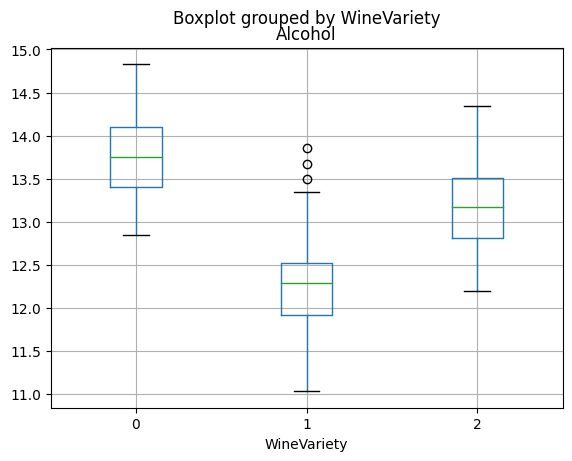

<Figure size 800x500 with 0 Axes>

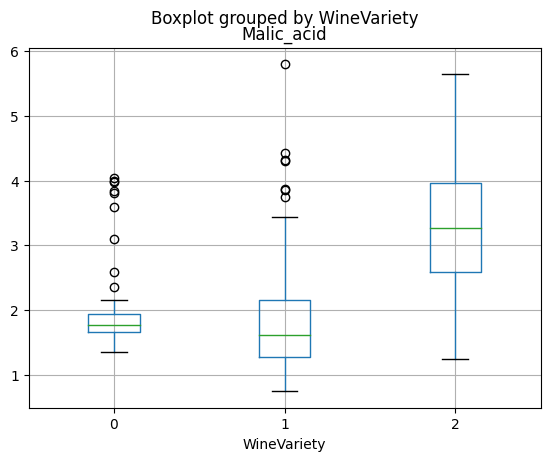

<Figure size 800x500 with 0 Axes>

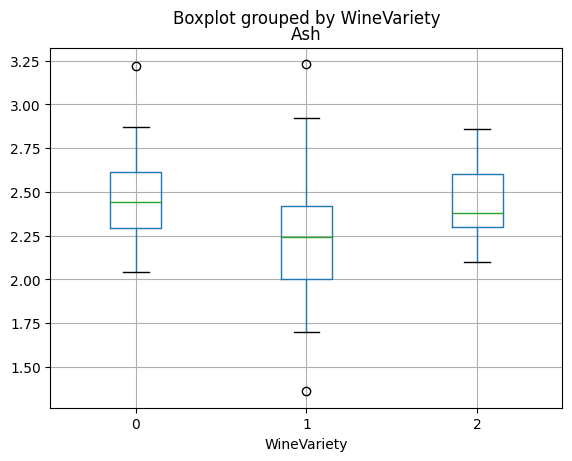

<Figure size 800x500 with 0 Axes>

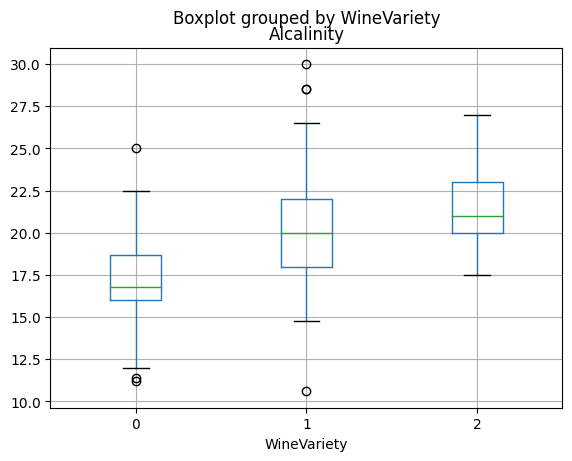

<Figure size 800x500 with 0 Axes>

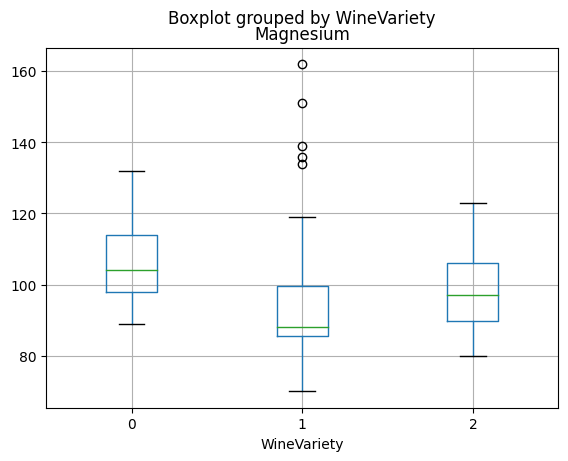

<Figure size 800x500 with 0 Axes>

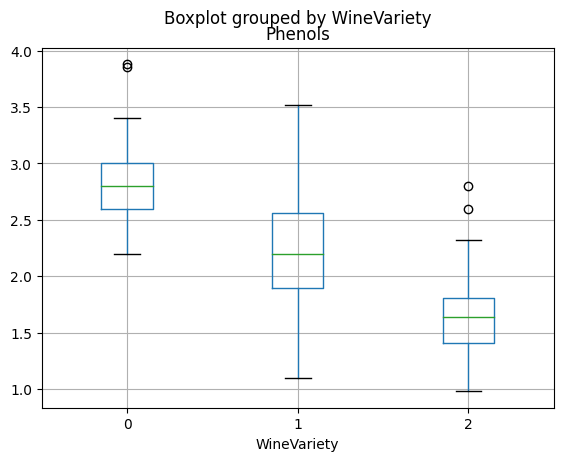

<Figure size 800x500 with 0 Axes>

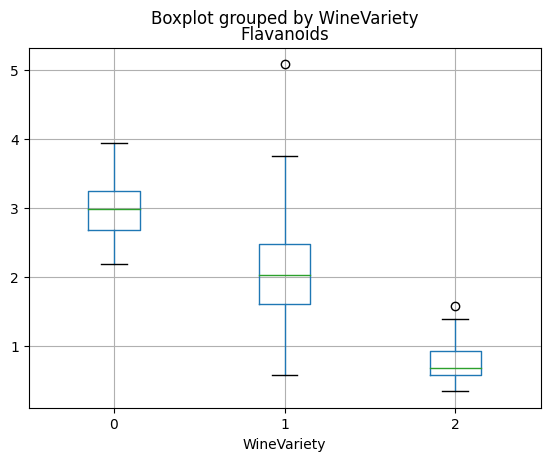

<Figure size 800x500 with 0 Axes>

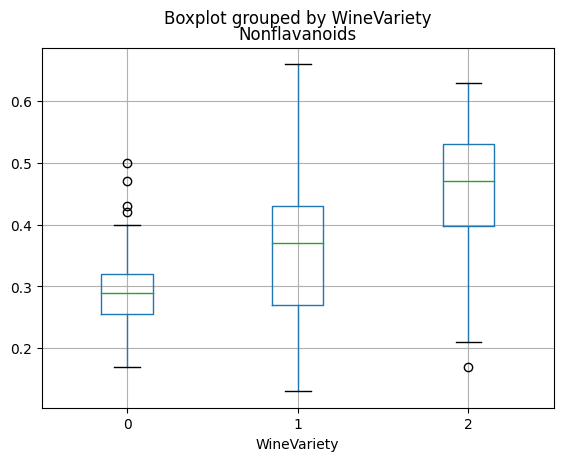

<Figure size 800x500 with 0 Axes>

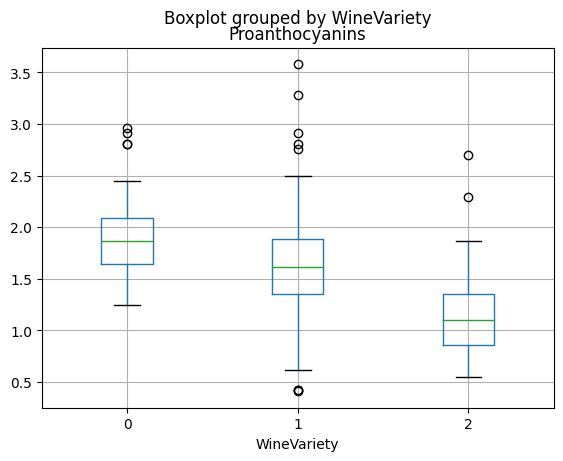

<Figure size 800x500 with 0 Axes>

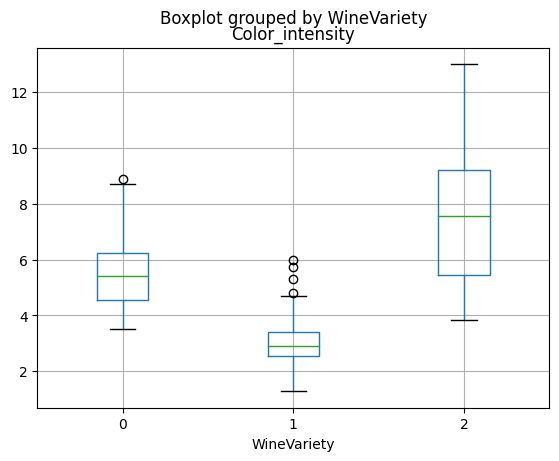

<Figure size 800x500 with 0 Axes>

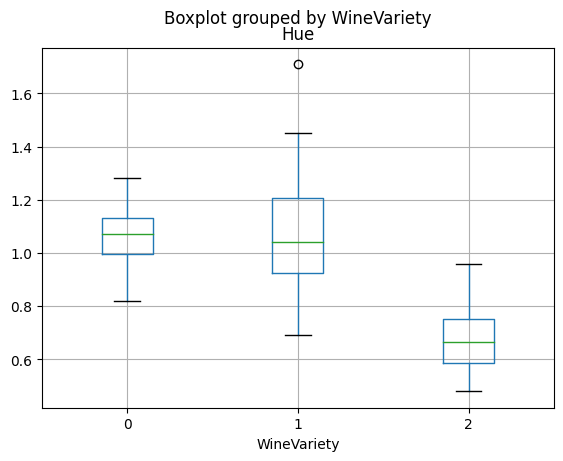

<Figure size 800x500 with 0 Axes>

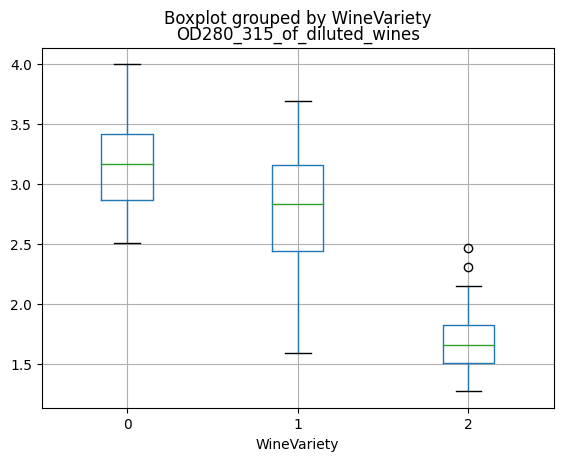

<Figure size 800x500 with 0 Axes>

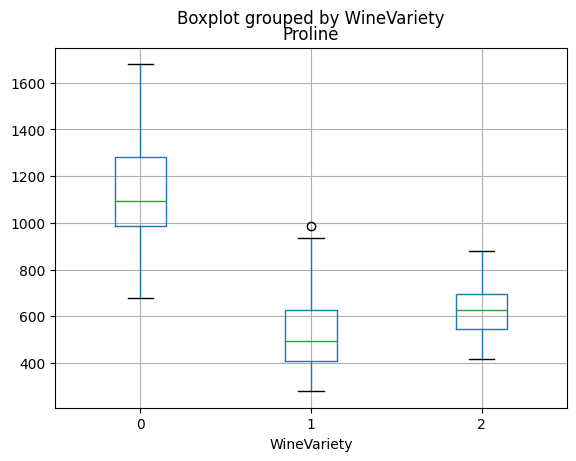

In [7]:
import matplotlib.pyplot as plt

label = "WineVariety"
features = (data.columns).drop(label)
for col in features:
    fig = plt.figure(figsize=(8,5))
    data.boxplot(column=col, by=label)
    plt.title(col)
plt.show()

In [23]:
label = "WineVariety"
features = (data.columns).drop(label)

X = data[features].values
y = data[label].values

print(f"Label:\n {label}\n Shape: {y.shape} \n\nFeatures:\n {features.values}\n Shape: {X.shape}")

Label:
 WineVariety
 Shape: (178,) 

Features:
 ['Alcohol' 'Malic_acid' 'Ash' 'Alcalinity' 'Magnesium' 'Phenols'
 'Flavanoids' 'Nonflavanoids' 'Proanthocyanins' 'Color_intensity' 'Hue'
 'OD280_315_of_diluted_wines' 'Proline']
 Shape: (178, 13)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

print ('Training Set: %d, Test Set: %d \n' % (X_train.shape[0], X_test.shape[0]))

Training Set: 124, Test Set: 54 



In [25]:
from sklearn.linear_model import LogisticRegression

reg = 0.1
model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)

In [26]:
predictions = model.predict(X_test)
print(f"Actual labels: {y_test[:10]}")
print(f"Predicted labels: {predictions[:10]}")

Actual labels: [2 2 2 1 1 0 1 0 1 2]
Predicted labels: [2 2 2 1 1 0 1 0 1 2]


In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9656084656084656
Overall Recall: 0.9656084656084656


In [32]:
from sklearn.metrics import confusion_matrix

mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


[[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


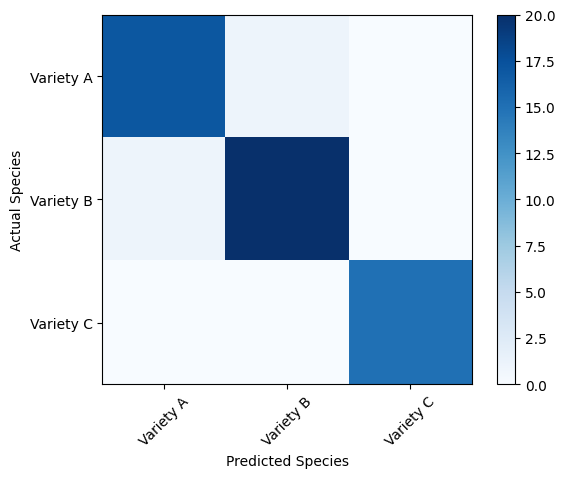

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(mcm)

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(WineVariety))
plt.xticks(tick_marks, WineVariety, rotation=45)
plt.yticks(tick_marks, WineVariety)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

variety_prob = model.predict_proba(X_test)

auc = roc_auc_score(y_test,variety_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9955707872374538


## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

### Preprocess data in a pipeline

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,5,6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 5, 6])])),
                ('regressor', LogisticRegression())])


Overall Accuracy: 0.9259259259259259
Overall Precision: 0.9269005847953217
Overall Recall: 0.9301587301587301
Average AUC: 0.9911195800084688


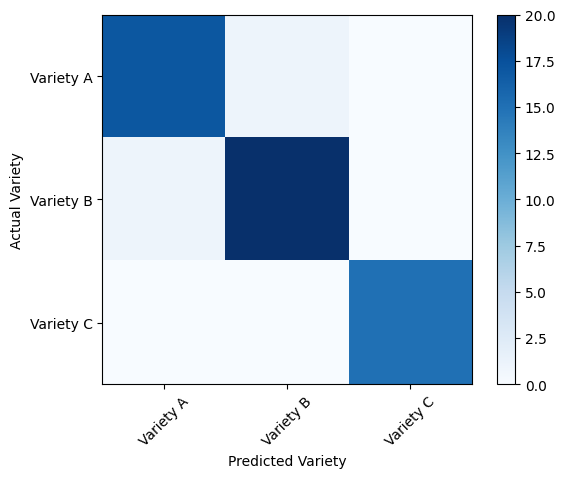

In [56]:
# Get predictions from test data
predictions = multi_model.predict(X_test)
prob = multi_model.predict_proba(X_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(WineVariety))
plt.xticks(tick_marks, WineVariety, rotation=45)
plt.yticks(tick_marks, WineVariety)
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

In [57]:
import joblib

# Save the model as a pickle file
filename = './winevariety_model.pkl'
joblib.dump(multi_model, filename)

['./winevariety_model.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [58]:
# Load the model from the file
model = joblib.load(filename)
new_data = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
predictions = model.predict(new_data)
for pred in predictions:
    print(WineVariety[pred])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14,) + inhomogeneous part.